<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Explorar_datos_de_desercion_estudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre**: Rubén ¨Pizarro Gurrola, rpizarro@itdurango.edu.mx
Febrero 2025



# Objetivo

Analizar y explorar descriptivamente el conjunto de datos de deservción escolar.

## Variables del conjunto de datos


# Desarrollo

Se va a realizar lo siguiente:

* Cargar librerías
* Cargar funciones adecuadas
* Cargar datos
* Identificar variables de interés cuantitativas y cualitativas del conjunto de datos
* Explorar y analizar descriptivamente las variables numéricas o cuntitativas
* Visualizar histograma de las variables numéricas de interés
* Explorar y analizar descriptivamente las variables de tipo categórica o cualitativas
* Visualizar con diagrama de barra


## Cargar librerías



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Tal vez se use
from scipy import stats # esatadísticos

import math


## Cargar funciones

Se cargan funciones personalizadas que se hacen anticipadamente para la ejecuión adecuada del caso


In [ ]:

def f_cargar_datos(ruta_archivo, tipo='csv', hoja_excel=None, separador=','):
    """
    Carga datos desde un archivo especificado.

    Parámetros:
    - ruta_archivo (str): Ruta del archivo a cargar.
    - tipo (str): Tipo de archivo a cargar ('csv', 'excel', 'txt'). Por defecto es 'csv'.
    - hoja_excel (str): Nombre o índice de la hoja, en caso de ser un archivo Excel. Por defecto es None.
    - separador (str): Separador para archivos de texto o CSV. Por defecto es ','.

    Retorna:
    - DataFrame: Un DataFrame con los datos cargados.
    """
    try:
        if tipo == 'csv':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        elif tipo == 'excel':
            datos = pd.read_excel(ruta_archivo, sheet_name=hoja_excel)
        elif tipo == 'txt':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        else:
            raise ValueError("El tipo de archivo no es soportado. Use 'csv', 'excel' o 'txt'.")

        print("Datos cargados correctamente.")
        return datos

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error al cargar los datos: {e}")


def f_eliminar_columnas(datos, columnas):
    """
    Elimina las columnas especificadas de un DataFrame.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columnas (list): Lista de nombres de columnas a eliminar.

    Retorna:
    - DataFrame: El DataFrame sin las columnas especificadas.
    """
    try:
        # Verificar si todas las columnas existen
        columnas_existentes = [col for col in columnas if col in datos.columns]
        if not columnas_existentes:
            print("Ninguna de las columnas especificadas existe en el DataFrame.")
            return datos

        # Eliminar las columnas especificadas
        datos_actualizado = datos.drop(columns=columnas_existentes)
        print(f"Columnas eliminadas correctamente: {columnas_existentes}")
        return datos_actualizado

    except Exception as e:
        print(f"Error al eliminar las columnas: {e}")
        return datos


def f_tabla_frecuencia(datos, columna):
    """
    Genera una tabla de frecuencias para datos cualitativos.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columna (str): El nombre de la columna cualitativa a analizar.

    Retorna:
    - DataFrame: Tabla de frecuencias con columnas de frecuencia absoluta, relativa y acumulada.
    """
    try:
        # Contar frecuencias absolutas
        frecuencia = datos[columna].value_counts().reset_index()
        frecuencia.columns = [columna, 'Frecuencia_Absoluta']

        # Calcular frecuencia relativa y porcentual
        total = frecuencia['Frecuencia_Absoluta'].sum()
        frecuencia['Frecuencia_Relativa'] = frecuencia['Frecuencia_Absoluta'] / total
        frecuencia['Frecuencia_Porcentual'] = frecuencia['Frecuencia_Relativa'] * 100

        # Calcular frecuencias acumuladas
        frecuencia['Frecuencia_Acumulada'] = frecuencia['Frecuencia_Absoluta'].cumsum()
        frecuencia['Frecuencia_Porcentual_Acumulada'] = frecuencia['Frecuencia_Porcentual'].cumsum()

        return frecuencia

    except KeyError:
        print(f"Error: La columna '{columna}' no existe en el DataFrame.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

def f_histograma(datos, variable, barras=10):
    # Convertir la variable a un array para cálculos estadísticos
    valores = np.array(datos[variable])

    # Calcular medidas estadísticas
    media = np.mean(valores)
    mediana = np.median(valores)
    # moda = stats.mode(valores)[0][0]

    # Crear el histograma
    plt.figure(figsize=(8, 6))
    plt.hist(valores, bins=barras, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
    # plt.axvline(moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f}')

    # Etiquetas y título
    plt.title('Histograma con Media, Mediana')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

def f_barra(datos, variable, color='lightblue', mostrar='primeros'):
    # Contar la frecuencia de cada categoría
    frecuencias = datos[variable].value_counts()

    # Verificar cuántas categorías hay
    if len(frecuencias) > 10:
        if mostrar == 'primeros':
            frecuencias = frecuencias.head(10)  # Primeras 10 categorías
        elif mostrar == 'ultimos':
            frecuencias = frecuencias.tail(10)  # Últimas 10 categorías

    # Crear el diagrama de barras
    plt.figure(figsize=(8, 6))
    barras = plt.bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)

    # Agregar etiquetas y título
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.title(f'Diagrama de Barras de {variable} (Mostrando {mostrar} 10)')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización si son largas

    # Mostrar valores encima de cada barra
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontsize=10)

    # Mostrar el gráfico
    plt.show()

def f_barra_multiple_matriz(datos, variables=None, color='lightblue', mostrar='primeros'):
    # Obtener columnas categóricas si no se especificaron
    if variables is None:
        variables = datos.select_dtypes(include=['object', 'category']).columns.tolist()

    # Determinar la disposición de la matriz según el número de columnas categóricas
    num_columnas = len(variables)
    if num_columnas <= 4:
        filas, columnas = 2, 2
    elif num_columnas <= 9:
        filas, columnas = 3, 3
    elif num_columnas <= 16:
        filas, columnas = 4, 4
    else:
        columnas = 4
        filas = math.ceil(num_columnas / columnas)

    # Crear la figura y subplots
    fig, axes = plt.subplots(filas, columnas, figsize=(columnas * 5, filas * 4))
    axes = axes.flatten()  # Convertir los ejes en una lista para indexar fácilmente

    # Generar gráficos
    for i, variable in enumerate(variables):
        # Contar la frecuencia de cada categoría
        frecuencias = datos[variable].value_counts()
        total = frecuencias.sum()
        porcentajes = (frecuencias / total) * 100  # Convertir a porcentaje

        # Mostrar solo las primeras o últimas 10 categorías si hay más de 10
        if len(frecuencias) > 10:
            if mostrar == 'primeros':
                frecuencias = frecuencias.head(10)
                porcentajes = porcentajes.head(10)
            elif mostrar == 'ultimos':
                frecuencias = frecuencias.tail(10)
                porcentajes = porcentajes.tail(10)

        # Dibujar el diagrama de barras en el subplot correspondiente
        axes[i].bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{variable}')
        axes[i].set_xlabel('Categorías')
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

        # Mostrar valores como porcentajes sobre las barras
        for j, (valor, porcentaje) in enumerate(zip(frecuencias.values, porcentajes)):
            axes[i].text(j, valor, f'{porcentaje:.1f}%', ha='center', va='bottom', fontsize=8)

    # Ocultar subplots vacíos
    for ax in axes[num_columnas:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



# Función que visualiza múltiples histogramas de variables numéricas
def f_histograma_multiple_matriz(datos, columnas=None, bins=10, color='skyblue'):
    """
    Genera múltiples histogramas organizados en una matriz dependiendo del número de variables numéricas seleccionadas.

    Parámetros:
    datos (pd.DataFrame): DataFrame que contiene los datos.
    columnas (list or None): Lista de columnas a graficar. Si es None, selecciona todas las columnas numéricas.
    bins (int): Número de intervalos para los histogramas.
    color (str): Color de los histogramas.

    Retorno:
    Visualiza múltiples histogramas organizados automáticamente.
    """
    # Si no se especifican columnas, selecciona todas las numéricas
    if columnas is None:
        columnas = datos.select_dtypes(include=['number']).columns.tolist()

    # Determinar el número de filas y columnas (3 o 4 columnas dependiendo del número de variables)
    n_vars = len(columnas)
    n_cols = 4 if n_vars > 6 else 3  # Si hay más de 6 variables, usa 4 columnas
    n_rows = math.ceil(n_vars / n_cols)  # Calcular el número de filas necesarias

    # Configuración de subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Aplanar para fácil iteración

    # Graficar cada variable
    for i, variable in enumerate(columnas):
        axes[i].hist(datos[variable].dropna(), bins=bins, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histograma de {variable}')
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel('Frecuencia')

    # Eliminar subplots vacíos si hay menos gráficos que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




## Cargar datos

Se hace uso de la función *f_cargar_datos()* previamente codificada y ejecutada para cargar los datos.



In [ ]:
# https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo.csv
url = "https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo.csv"
datos_cargados = f_cargar_datos(url)



Datos cargados correctamente.


Cargar datos localmente


In [ ]:
# Cargar datos localmente
# datos_desercion_estudiantil_completo_transformado
# url = "sample_data/datos_desercion_estudiantil_completo.csv"
# datos_cargados = f_cargar_datos(url)

Variables:

In [ ]:
# Extraer nombres de columnas
variables = datos_cargados.columns
print(variables)

Index(['ID_Estudiante', 'Fecha_Registro', 'Edad', 'Estado_Civil',
       'Lugar_Residencia', 'Calificaciones', 'Asistencia_a_clases',
       'Semestre_Actual', 'Reprobacion_Asignaturas', 'Horas_Estudio_Semanales',
       'Nivel_Socioeconomico', 'Ingreso_Familiar_Mensual', 'Apoyo_Financiero',
       'Empleo_Parcial_o_Tiempo_Completo', 'Red_Apoyo_Social',
       'Participacion_Extracurricular', 'Relaciones_Interpersonales',
       'Problemas_Emocionales', 'Adaptacion_Entorno_Escolar', 'Personalidad',
       'Autoeficacia_Academica', 'Horas_Sueno', 'Condiciones_Salud',
       'Problemas_Familiares', 'Dependientes_en_Hogar', 'Tipo_Institucion',
       'Distancia_Centro_Estudios', 'Acceso_Servicios_Basicos', 'Desercion'],
      dtype='object')


## Visualizar los primeros 10 registros



In [ ]:
datos_cargados.head(10)

,ID_Estudiante,Fecha_Registro,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
0,769,2024-03-25,24,CASADO,LOCAL,77,78,-1,0,5,...,Extrovertido,Media,7,MALA,NO,0,PRIVADA,7,SI,SI
1,5151,2024-05-26,23,UNION LIBRE,FORÁNEO,84,77,4,4,14,...,Extrovertido,Baja,5,REGULAR,SI,0,PUBLICA,26,SI,NO
2,3224,2024-03-15,18,UNION LIBRE,LOCAL,76,76,0,3,12,...,Introvertido,Alta,6,MALA,SI,5,PUBLICA,22,NO,SI
3,2712,2024-05-14,24,SOLTERO,FORÁNEO,77,78,4,1,5,...,Extrovertido,Media,8,BUENA,SI,4,PUBLICA,17,SI,SI
4,3433,2024-06-27,22,SOLTERO,FORÁNEO,95,89,6,3,-1,...,Extrovertido,Media,6,BUENA,NO,2,PRIVADA,10,SI,NO
5,3324,2024-05-15,16,SOLTERO,LOCAL,80,57,0,0,0,...,Introvertido,Alta,7,BUENA,SI,2,PUBLICA,38,NO,SI
6,2698,2024-06-14,20,SOLTERO,LOCAL,74,47,7,2,11,...,Introvertido,Baja,5,REGULAR,NO,2,PUBLICA,20,NO,SI
7,2375,2024-04-17,20,SOLTERO,LOCAL,71,72,10,1,0,...,Extrovertido,Alta,4,MALA,NO,4,PUBLICA,18,SI,NO
8,3111,2024-03-18,18,UNION LIBRE,LOCAL,66,75,0,2,9,...,Introvertido,Media,7,REGULAR,SI,6,PUBLICA,18,NO,NO
9,2726,2024-05-31,22,UNION LIBRE,FORÁNEO,55,73,9,3,12,...,Introvertido,Alta,5,REGULAR,NO,5,PRIVADA,44,NO,SI


## Visualizar los últimos 10 registros


In [ ]:
datos_cargados.tail(10)

,ID_Estudiante,Fecha_Registro,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
4990,2685,2024-01-19,20,SOLTERO,LOCAL,87,80,4,1,2,...,Extrovertido,Media,9,REGULAR,SI,2,PRIVADA,19,SI,SI
4991,4307,2024-04-13,21,SOLTERO,LOCAL,51,112,4,4,8,...,Introvertido,Alta,7,BUENA,SI,3,PRIVADA,37,SI,NO
4992,2464,2024-05-09,18,SOLTERO,LOCAL,93,74,0,1,14,...,Extrovertido,Alta,9,BUENA,SI,1,PUBLICA,22,SI,SI
4993,2229,2024-02-22,23,SOLTERO,LOCAL,77,98,3,5,6,...,Introvertido,Alta,4,BUENA,SI,2,PUBLICA,40,NO,SI
4994,1063,2024-05-28,19,UNION LIBRE,LOCAL,80,64,1,2,9,...,Extrovertido,Baja,8,REGULAR,SI,1,PUBLICA,35,SI,NO
4995,904,2024-02-15,19,SOLTERO,FORÁNEO,62,54,4,-1,16,...,Extrovertido,Baja,6,MALA,SI,3,PRIVADA,14,SI,NO
4996,2007,2024-05-01,22,SOLTERO,LOCAL,97,63,11,4,8,...,Introvertido,Baja,6,MALA,NO,4,PUBLICA,14,SI,SI
4997,3310,2024-05-26,22,SOLTERO,FORÁNEO,72,64,2,0,10,...,Extrovertido,Baja,5,MALA,SI,2,PUBLICA,22,NO,SI
4998,2300,2024-06-16,23,SOLTERO,LOCAL,58,76,2,2,17,...,Extrovertido,Baja,9,REGULAR,SI,3,PUBLICA,23,SI,NO
4999,2843,2024-02-11,18,UNION LIBRE,LOCAL,89,90,10,6,8,...,Introvertido,Baja,5,REGULAR,SI,1,PRIVADA,29,SI,NO


## Preparar los datos

Del conjunto de datos original, solo seleccionar las variables de interés para análisis.

### Variables independientes de interés inicial

* Edad
* Estado_Civil
* Lugar_Residencia
* Calificaciones
* Asistencia_a_clases
* Semestre_Actual
* Reprobacion_Asignaturas
* Horas_Estudio_Semanales
* Nivel_Socioeconomico
* Ingreso_Familiar_Mensual
* Apoyo_Financiero
* Empleo_Parcial_o_Tiempo_Completo
* Red_Apoyo_Social
* Participacion_Extracurricular
* Relaciones_Interpersonales
* Problemas_Emocionales
* Adaptacion_Entorno_Escolar
* Personalidad
* Autoeficacia_Academica
* Horas_Sueno
* Condiciones_Salud
* Problemas_Familiares
* Dependientes_en_Hogar
* Tipo_Institucion
* Distancia_Centro_Estudios
* Acceso_Servicios_Basicos


## La variable dependiente:
* Desercion

Excluir las variables 'id', 'fecha_registro'



In [ ]:
columnas = ['ID_Estudiante', 'Fecha_Registro']
datos = f_eliminar_columnas(datos_cargados, columnas)
datos.head()

Columnas eliminadas correctamente: ['ID_Estudiante', 'Fecha_Registro']


,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,Nivel_Socioeconomico,Ingreso_Familiar_Mensual,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
0,24,CASADO,LOCAL,77,78,-1,0,5,MEDIO,17834,...,Extrovertido,Media,7,MALA,NO,0,PRIVADA,7,SI,SI
1,23,UNION LIBRE,FORÁNEO,84,77,4,4,14,BAJO,14960,...,Extrovertido,Baja,5,REGULAR,SI,0,PUBLICA,26,SI,NO
2,18,UNION LIBRE,LOCAL,76,76,0,3,12,MEDIO,14284,...,Introvertido,Alta,6,MALA,SI,5,PUBLICA,22,NO,SI
3,24,SOLTERO,FORÁNEO,77,78,4,1,5,MEDIO,8544,...,Extrovertido,Media,8,BUENA,SI,4,PUBLICA,17,SI,SI
4,22,SOLTERO,FORÁNEO,95,89,6,3,-1,MEDIO,6870,...,Extrovertido,Media,6,BUENA,NO,2,PRIVADA,10,SI,NO


## Ver estructura de datos

Los datos ya con las columnas adecuadas: los tipos de datos que se indica de tipo *int64* son numéricos o cuantitativos y los que aparecen como *object* se interpretan como categóricos o cualitativos.


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Edad                              5000 non-null   int64 
 1   Estado_Civil                      5000 non-null   object
 2   Lugar_Residencia                  5000 non-null   object
 3   Calificaciones                    5000 non-null   int64 
 4   Asistencia_a_clases               5000 non-null   int64 
 5   Semestre_Actual                   5000 non-null   int64 
 6   Reprobacion_Asignaturas           5000 non-null   int64 
 7   Horas_Estudio_Semanales           5000 non-null   int64 
 8   Nivel_Socioeconomico              5000 non-null   object
 9   Ingreso_Familiar_Mensual          5000 non-null   int64 
 10  Apoyo_Financiero                  5000 non-null   object
 11  Empleo_Parcial_o_Tiempo_Completo  5000 non-null   object
 12  Red_Apoyo_Social    

## Determinar variables cualitativas



## Explorar las variables cuantitativas

Con la función *describe()* se obtienen los estadísticos elementales de las variables cuantitativas de un conjunto de datos.


In [ ]:
datos.describe()

,Edad,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,Ingreso_Familiar_Mensual,Horas_Sueno,Dependientes_en_Hogar,Distancia_Centro_Estudios
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000
mean,20.912800,74.567800,74.898000,4.965400,2.012400,9.883000,11645.7362,6.419400,2.077200,25.035800
std,2.340148,14.408418,14.024112,2.806738,1.590582,5.597712,5051.1135,1.980376,1.631494,14.191053
min,13.000000,23.000000,20.000000,-3.000000,-4.000000,-8.000000,-8262.0000,0.000000,-4.000000,-28.000000
25%,19.000000,65.000000,66.000000,3.000000,1.000000,6.000000,8240.0000,5.000000,1.000000,15.000000
50%,21.000000,75.000000,75.000000,5.000000,2.000000,10.000000,11579.0000,6.000000,2.000000,25.000000
75%,22.000000,84.000000,84.000000,7.000000,3.000000,14.000000,15196.0000,8.000000,3.000000,35.000000
max,30.000000,123.000000,119.000000,14.000000,8.000000,28.000000,29569.0000,16.000000,8.000000,80.000000


### Histogramas de variables  numéricas


In [ ]:
columnas_numericas = datos.select_dtypes(include=['number']).columns.tolist()
columnas_numericas

['Edad',
 'Calificaciones',
 'Asistencia_a_clases',
 'Semestre_Actual',
 'Reprobacion_Asignaturas',
 'Horas_Estudio_Semanales',
 'Ingreso_Familiar_Mensual',
 'Horas_Sueno',
 'Dependientes_en_Hogar',
 'Distancia_Centro_Estudios']

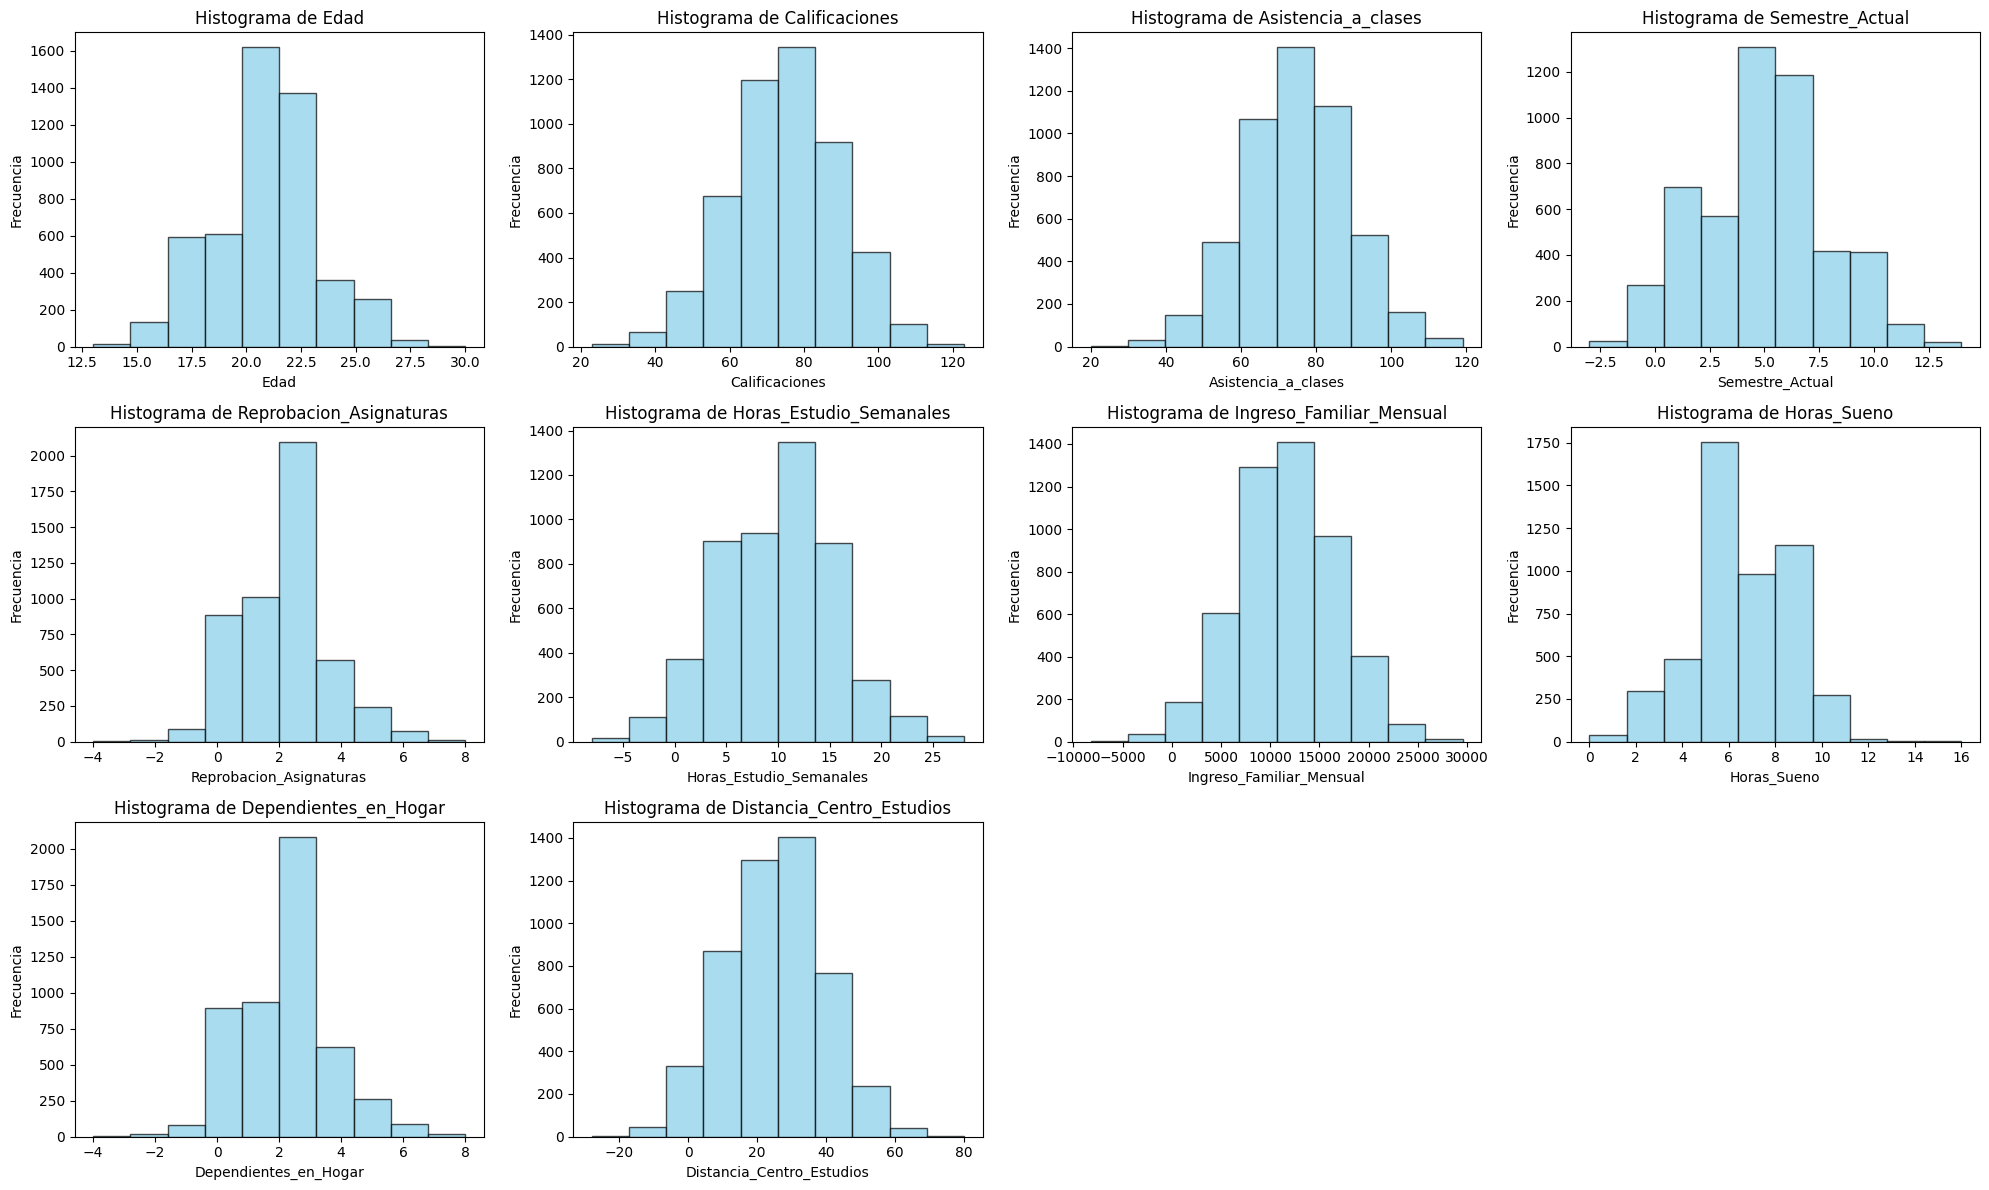

In [ ]:
f_histograma_multiple_matriz(datos[columnas_numericas])

## Histograma de variables cuantitativas de interés

### Edad


**Cuestionamientos:** ¿Qué se observa con los datos cuantitativos?, ¿qué análisis se hace?

El valor de la media muestral es aproximadamente 21.48 o lo que es lo mismo es el promedio de edad.

La mediana de la edad es de 21.

Se observan datos homogéneos entre 18 y 25 años con respecto a la edad

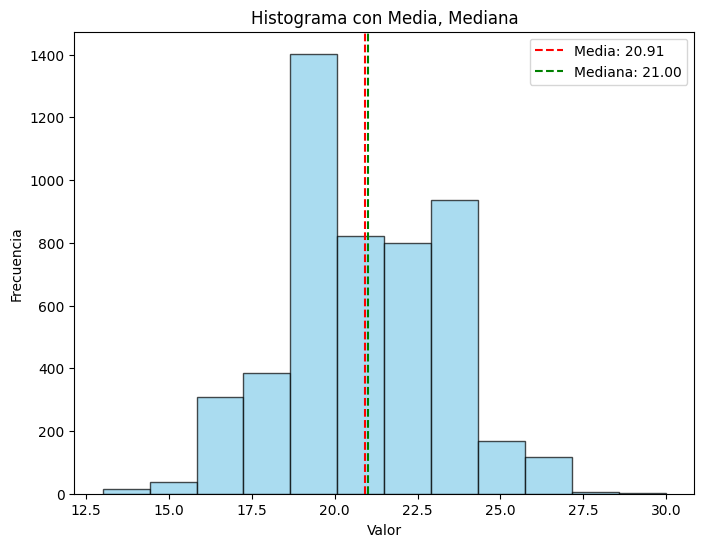

In [ ]:
f_histograma(datos, 'Edad', 12)

Faltan mas variables numéricas y generar su histograma de cada una de ellas.

Pendiente

## Explorar y analizar variables cualitativas o categóricas


**Cuestionamientos:** ¿Qué se observa con los datos cualitativos?, ¿qué análisis se hace?


### Estado_Civil

In [ ]:
tabla = f_tabla_frecuencia(datos, 'Estado_Civil')
tabla

,Estado_Civil,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,SOLTERO,3086,0.6172,61.72,3086,61.72
1,UNION LIBRE,976,0.1952,19.52,4062,81.24
2,CASADO,938,0.1876,18.76,5000,100.00


Aproximadamente el 18% de los datos recabados son estudiantes casados, el 61% solteros y el 18% vive en unión libre.


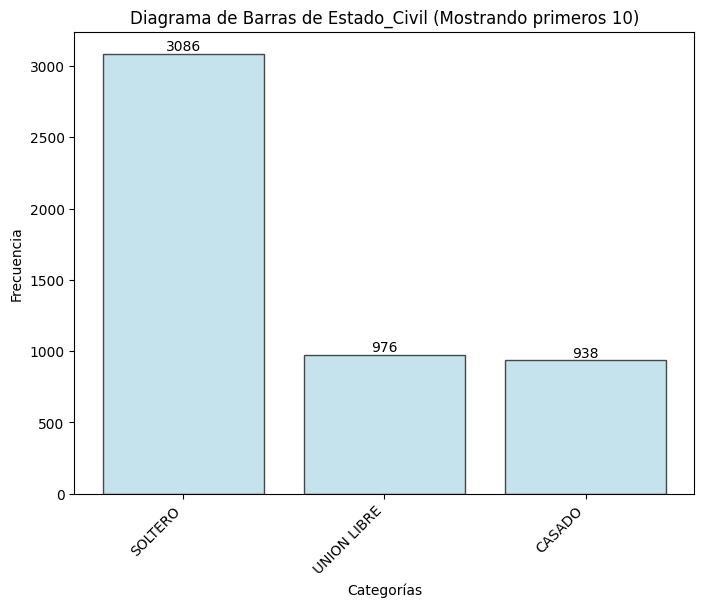

In [ ]:
f_barra(datos, 'Estado_Civil')

### Lugar_Residencia


In [ ]:
tabla = f_tabla_frecuencia(datos, 'Lugar_Residencia')
tabla

,Lugar_Residencia,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,LOCAL,3509,0.7018,70.18,3509,70.18
1,FORÁNEO,1491,0.2982,29.82,5000,100.00


Aproximadamente el 70% de los datos recabados viven localmente y el 29% vive son foráneos con respecto a la Institución educativa.

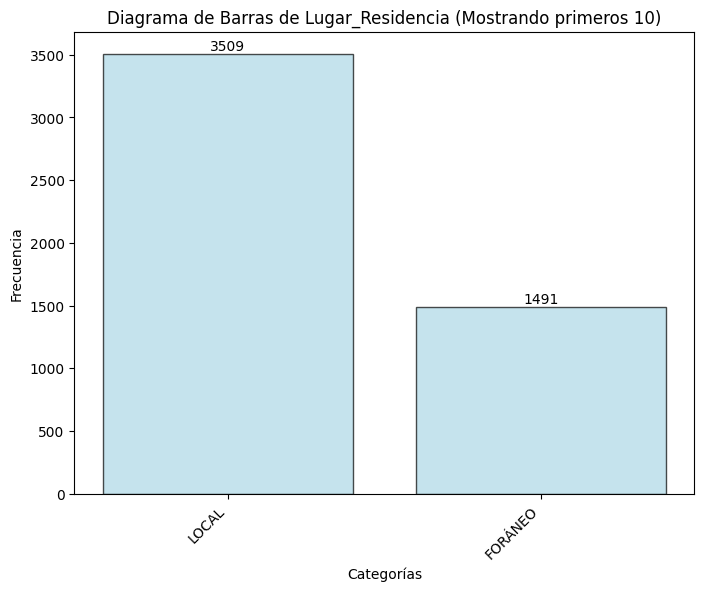

In [ ]:
f_barra(datos, 'Lugar_Residencia')

### Nivel_Socioeconomico


In [ ]:
tabla = f_tabla_frecuencia(datos, 'Nivel_Socioeconomico')
tabla

,Nivel_Socioeconomico,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,MEDIO,3541,0.7082,70.82,3541,70.82
1,BAJO,987,0.1974,19.74,4528,90.56
2,ALTO,472,0.0944,9.44,5000,100.00


Del total de los datos de la muestra, aproximadamente el 19% tiene un nivel económico bajo; un 70% nivel económico medio y un 9% nivel económico alto.

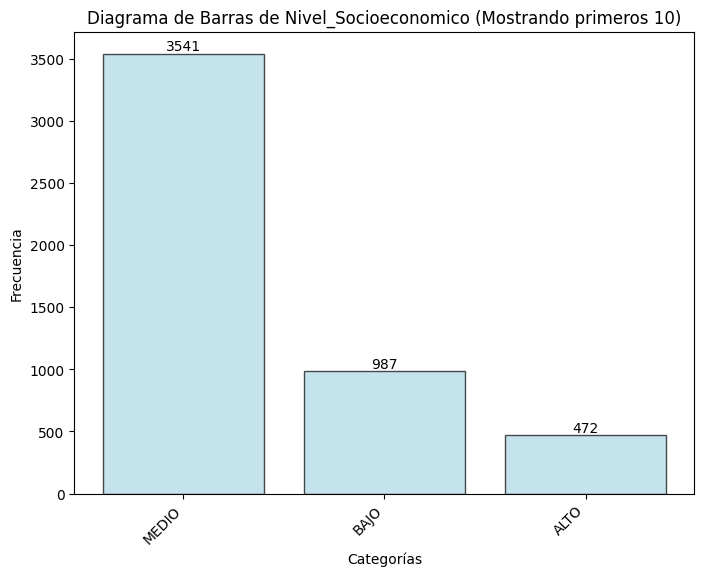

In [ ]:
f_barra(datos, 'Nivel_Socioeconomico')

### Apoyo_Financiero



In [ ]:
tabla = f_tabla_frecuencia(datos, 'Apoyo_Financiero')
tabla

,Apoyo_Financiero,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,NO,2989,0.5978,59.78,2989,59.78
1,SI,2011,0.4022,40.22,5000,100.00


Aproximadamente el 59.78% de los datos de la muestra son estudiantes que reciben apoyo financiero y el 40.22% no.



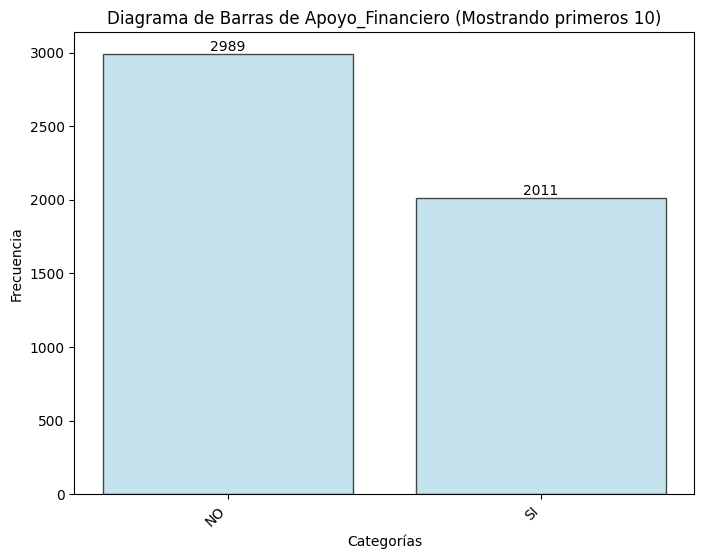

In [ ]:
f_barra(datos, 'Apoyo_Financiero')

### Empleo_Parcial_o_Tiempo_Completo

In [ ]:
tabla = f_tabla_frecuencia(datos, 'Empleo_Parcial_o_Tiempo_Completo')
tabla

,Empleo_Parcial_o_Tiempo_Completo,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,NO,3949,0.7898,78.98,3949,78.98
1,SI,1051,0.2102,21.02,5000,100.00


Aproximadamente el 21% de personas estudiantes trabaja y el 78% no.

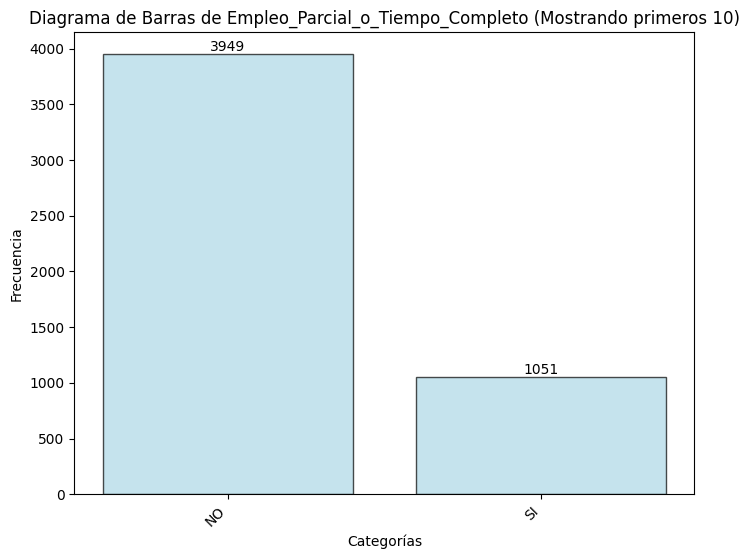

In [ ]:
f_barra(datos, 'Empleo_Parcial_o_Tiempo_Completo')

### Red_Apoyo_Social  

In [ ]:
tabla = f_tabla_frecuencia(datos, 'Red_Apoyo_Social')
tabla

,Red_Apoyo_Social,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,DEBIL,2506,0.5012,50.12,2506,50.12
1,MODERADO,1476,0.2952,29.52,3982,79.64
2,FUERTE,1018,0.2036,20.36,5000,100.00


El 50% de los estudiantes tiene apoyo social débil; el 29% un apoyo moderado y el 20% tiene un apoyo social fuerte.

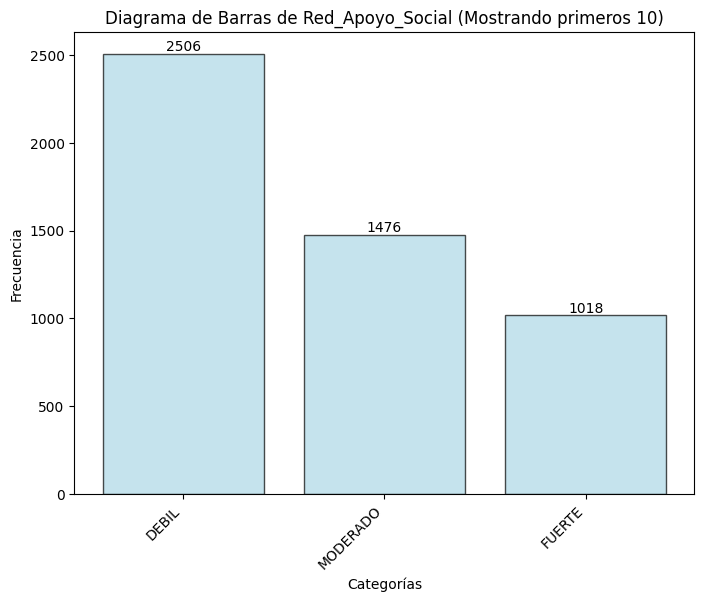

In [ ]:
f_barra(datos, 'Red_Apoyo_Social', mostrar='primeros')

### Participacion_Extracurricular

In [ ]:
tabla = f_tabla_frecuencia(datos, 'Participacion_Extracurricular')
tabla

,Participacion_Extracurricular,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,MEDIA,2457,0.4914,49.14,2457,49.14
1,BAJA,1523,0.3046,30.46,3980,79.60
2,ALTA,1020,0.2040,20.40,5000,100.00


Con respecto a la actividad extracurricular del estudiante, el 30.46% tienen una actividad baja; el 20.40% alta y el 49.14% actividad media.

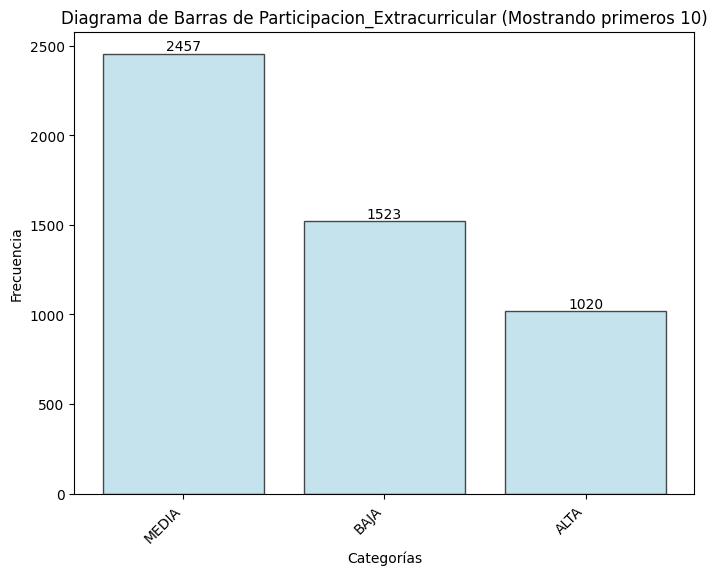

In [ ]:
f_barra(datos, 'Participacion_Extracurricular')

## Análisis descriptivo visual de todas las variables cualitativas

Faltan algunas otras variables categóricas, mejor todos en uno.

Con la función *select_dtypes()* se selecciona solo las variables categóricas *object*.


['Estado_Civil', 'Lugar_Residencia', 'Nivel_Socioeconomico', 'Apoyo_Financiero', 'Empleo_Parcial_o_Tiempo_Completo', 'Red_Apoyo_Social', 'Participacion_Extracurricular', 'Relaciones_Interpersonales', 'Problemas_Emocionales', 'Adaptacion_Entorno_Escolar', 'Personalidad', 'Autoeficacia_Academica', 'Condiciones_Salud', 'Problemas_Familiares', 'Tipo_Institucion', 'Acceso_Servicios_Basicos', 'Desercion']


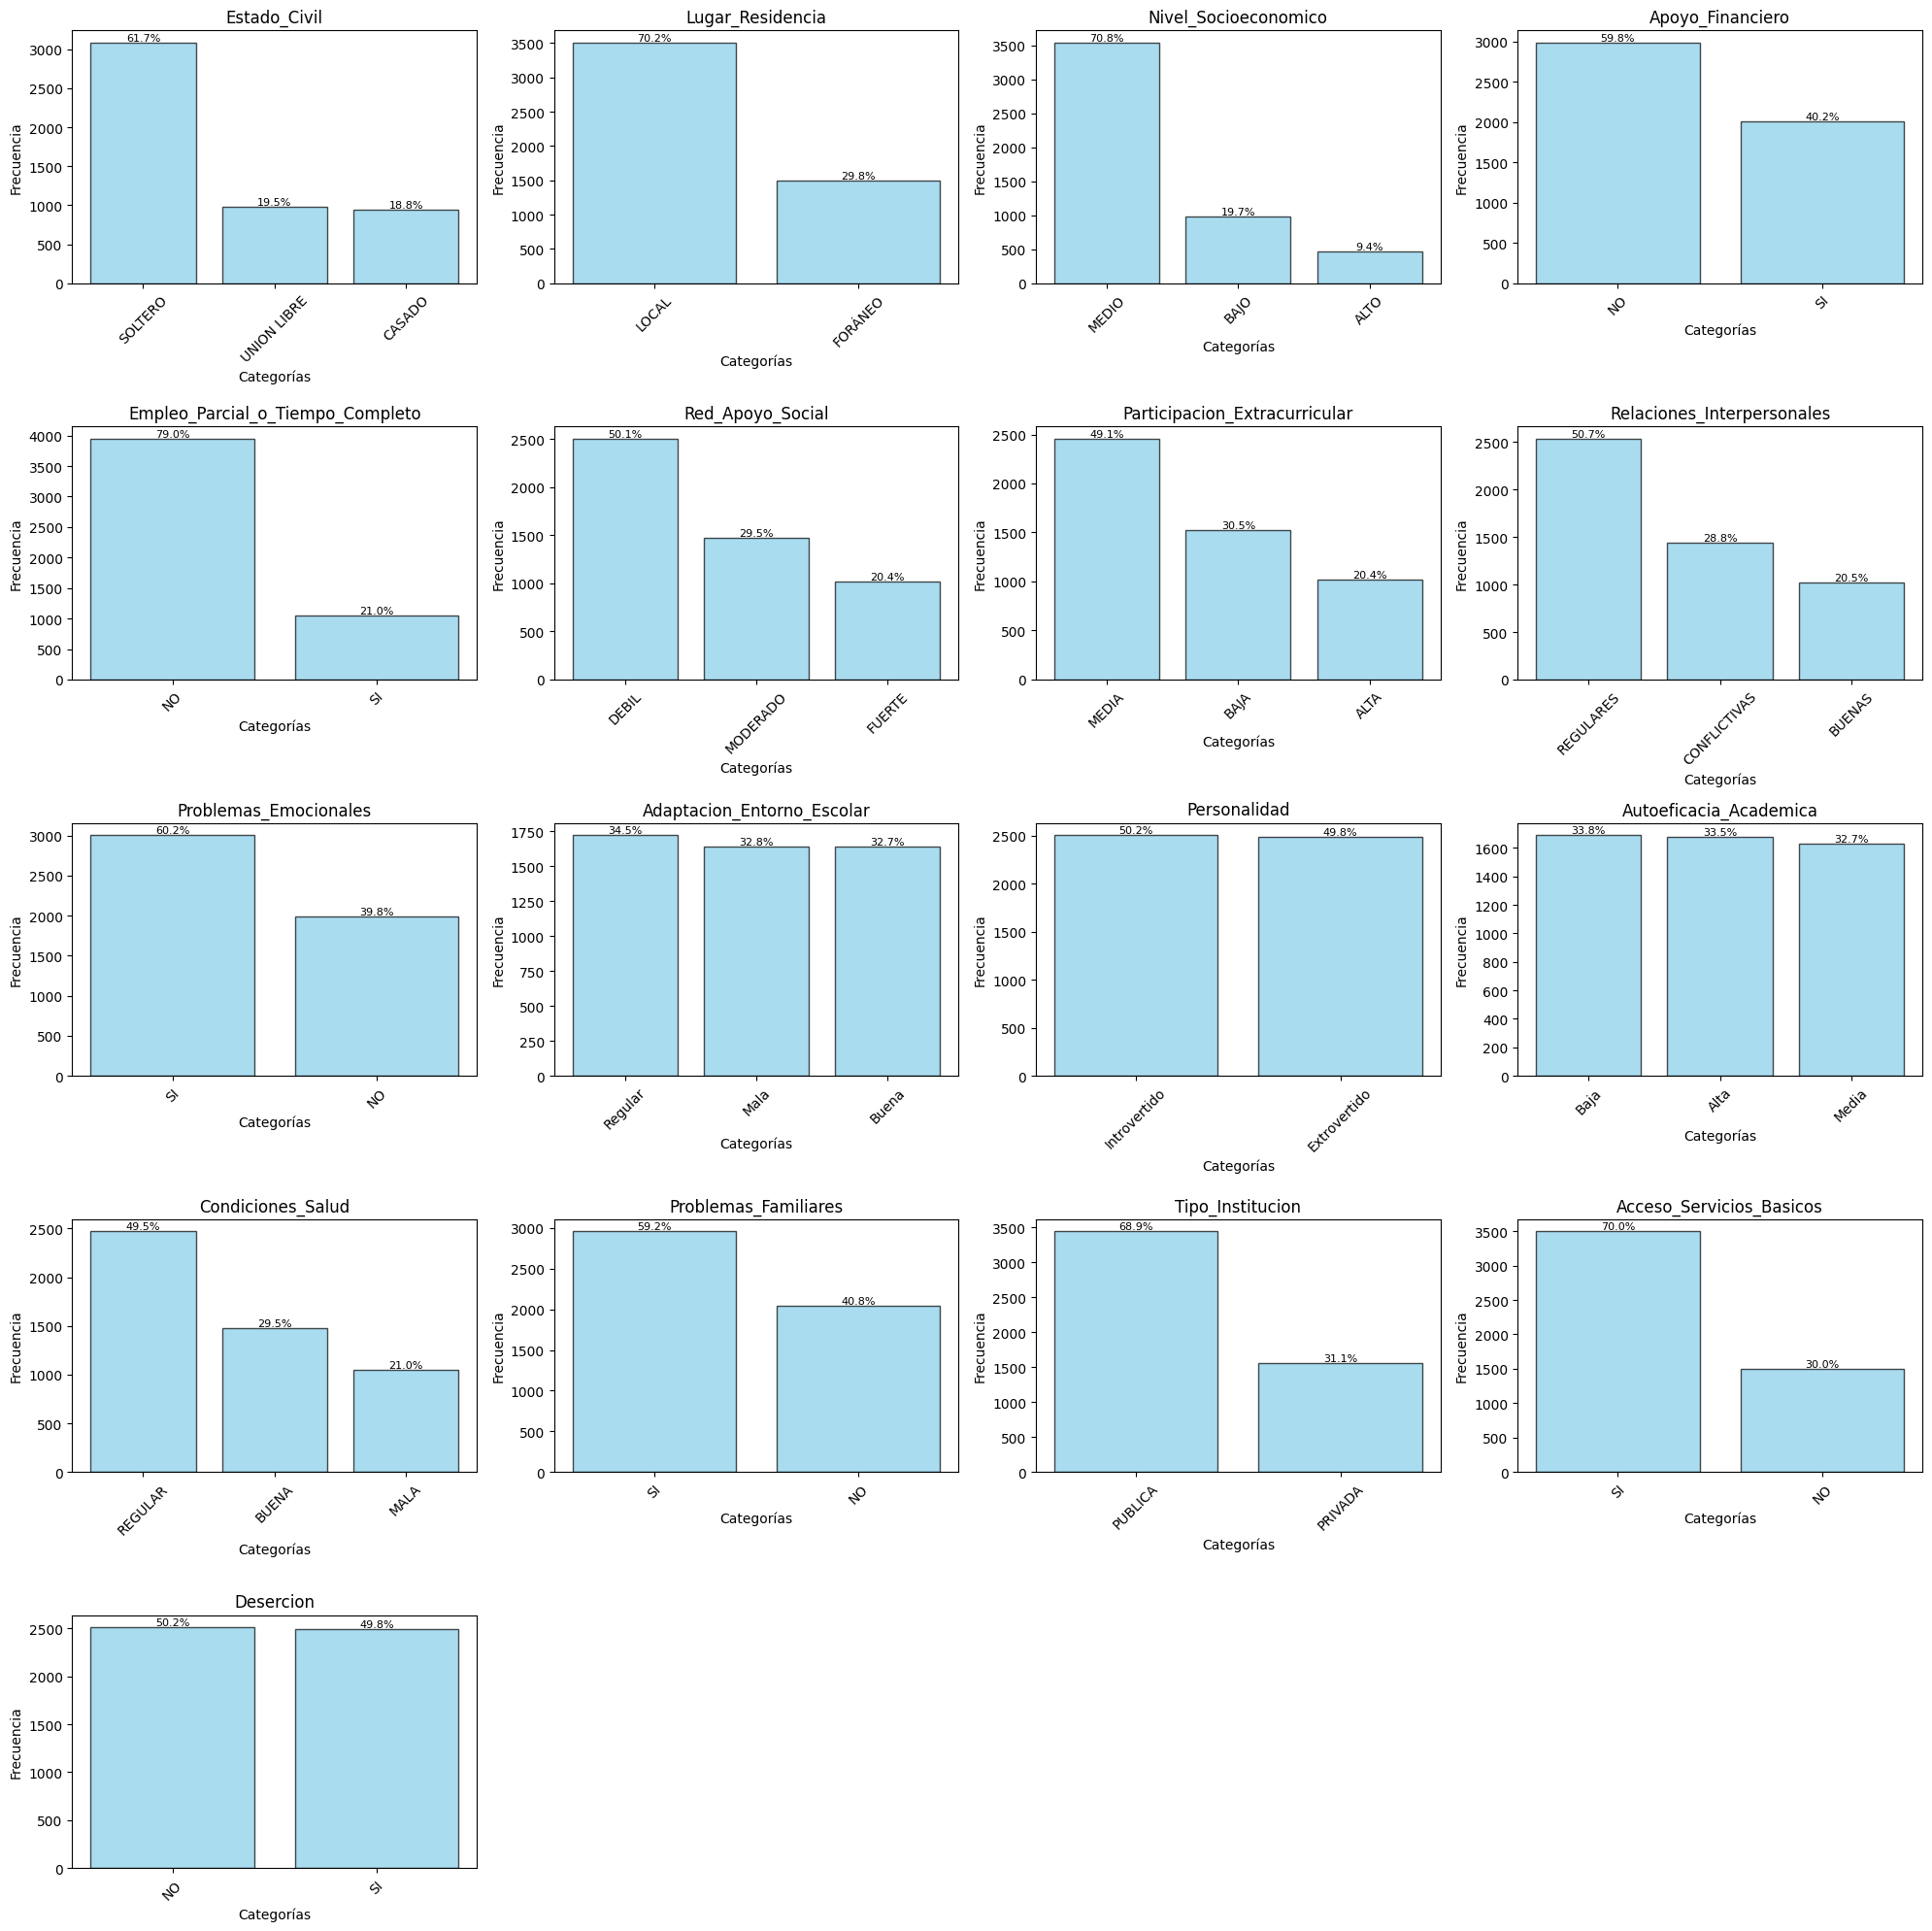

In [ ]:
columnas_categoricas = datos.select_dtypes(include=['object', 'category']).columns.tolist()
print(columnas_categoricas)
f_barra_multiple_matriz (datos, variables=columnas_categoricas, color='skyblue', mostrar='primeros')

# Interpretación

Con estos datos conteste y describa las siguientes preguntas:

* ¿Cuál es la variable dependiente?, ¿es numérica o categórica?

La variable dependiente es la de deserción que tiene un valor de SI y NO; es una variable de tipo categórica y de acuerdo a los datos el 50% de los estudiantes encuesntados tuvo una condición de deserción.



* ¿Cuáles son variables independientes?

Son el resto de las variables:

* Edad
* Estado_Civil
* Lugar_Residencia
* Calificaciones
* Asistencia_a_clases
* Semestre_Actual
* Reprobacion_Asignaturas
* Horas_Estudio_Semanales
* Nivel_Socioeconomico
* Ingreso_Familiar_Mensual
* Apoyo_Financiero
* Empleo_Parcial_o_Tiempo_Completo
* Red_Apoyo_Social
* Participacion_Extracurricular
* Relaciones_Interpersonales
* Problemas_Emocionales
* Adaptacion_Entorno_Escolar
* Personalidad
* Autoeficacia_Academica
* Horas_Sueno
* Condiciones_Salud
* Problemas_Familiares
* Dependientes_en_Hogar
* Tipo_Institucion
* Distancia_Centro_Estudios
* Acceso_Servicios_Basicos


* ¿Se recomienda modificar los nombres de variables?, ¿reducir el nombre?, tal vez a minúsculas o ¿dejarlas como están?

Se recomienda modificar en un proceso de transformación de datos los nombres de las variables a minúsculas para mayor certeza y control de las mismas así como reducir la longitud del nombre de la columna o variable.

## Variables cuantitativas o numéricas:

* 'Edad','Calificaciones',  'Asistencia_a_clases', 'Semestre_Actual',  'Reprobacion_Asignaturas',  'Horas_Estudio_Semanales',  'Ingreso_Familiar_Mensual',  'Horas_Sueno', 'Dependientes_en_Hogar','Distancia_Centro_Estudios'.

Se observa que las variables cuantitativas de acuerdo al sus histogramas tienen un c omportamiento normal, salvo hacer pruebas estadísticas de manera particular.


* Se comprenden los valores numéricos de esas variables?

En algunas variables se obesrvan deficiencias que pueden ser errores, por ejemplo estudiantes de 14 años tal vez sean valores atípicos; en cuanto al numéro de asignaturas reprobadas se identifican valores negativos, cosa que no debe ser real.

Se observa que hay estudiantes de semestre negativo, eso no es real, se recomienda transformar esos valores.

En cuanto a la calificación existen valores muy por debajo de 50, tal vez sean omisiones, deficiencias u errores se recomienda transformar esos valores en caso de que se detecten errores.

Se observa que hay numero de dependiente negativos por lo que se sugiere transformar; de igual forma se obseva ingresos economico negativos, por lo que también se sugiere transformar.

* ¿Qué análisis descriptivo se encuentran con respecto a las variables numéricas o cuantitativas?, la media, mediana, cuartiles y desviación estándar de cada variable cuantitativa?. Pendiente

* Existen datos atípicos u *outliers*?, ¿porqué hay esos valores?. Si hay valores atípicos.

* Que se va a hacer con los datos atípicos?

Se recomineda transformar los valores atípicos de cada variables por su estadística de la mediana estadística.


* Las distribuciones de las variables numéricas se observa que son normales?. Si son normales visualmente y de acuerdo al histograma.

* Se podrán estandarizar los valores numéricos y cómo hacerlo?.

Algunos modelos de *machine learning* recomienda que los datos sean estandarizados normalziados y/o escalados para mejore precisión, se harán en un proceso de transformación de datos.

* Se podrán escalar los valores numéricos y cómo hacerlo?, se recomienda escalar con alguna formula sugerida.

* Se pudiera optar por convertir algunas variables numéricas a categóricas tal vez por algun rango o intervalo o clase que agrupe valores numéricos?, ¿Cómo y cuáles?

La variable ingreso familiar a categóricas agrupando en ciertos rangos o intervalos tal vez ingresos BAJOS, MEDIOS, ALTOS.



## Variables cualitativas o categóricas:

* 'Estado_Civil','Lugar_Residencia','Nivel_Socioeconomico',Apoyo_Financiero','Empleo_Parcial_o_Tiempo_Completo','Red_Apoyo_Social','Participacion_Extracurricular','Relaciones_Interpersonales','Problemas_Emocionales','Adaptacion_Entorno_Escolar','Personalidad','Autoeficacia_Academica', 'Condiciones_Salud','Problemas_Familiares', 'Tipo_Institucion', 'Acceso_Servicios_Basicos', 'Desercion'

* ¿Cuál es la frecuencia de cada valor de cada variable cualitativa?
* Existen variables con frecuencias altas?, ¿cuáles?
* Hay variables cualitativas que tienen mayor incidencia sobre la variable dependiente?


Próximo caso Transformación de datos ...
**Pendiente**









